In [3]:
import torch
import sys
import pylab as plt

sys.path.append('../')
from Model.PatchCNN import PatchCNN

In [4]:
device = torch.device("cuda:0")
#num_layers = [3,4,6,3]  # res34
num_layers = [2,2,2,2] # res18
dropout_rate = 0
#dilation = 2
model = PatchCNN(layers=num_layers,dropout_rate=dropout_rate)
#state_dict = torch.load('/mnt/DATA_CRLM/Patches/Checkpoints/PatchCNN/PatchCNN_448_res34/PatchCNN_best.pth')
state_dict = torch.load('/mnt/DATA_CRLM/Checkpoint/PatchCNN/PatchCNN_448_mixed/PatchCNN_best.pth')
new_state_dict = {}
for key in model.state_dict():
    new_state_dict[key] = state_dict['module.'+key].double()
model.load_state_dict(new_state_dict)
model.eval()
model.to(device)

PatchCNN(
  (base): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [ ]:
import numpy as np
import pylab as plt
test_img = plt.imread('/mnt/DATA_CRLM/Patches/CRLM_immuno/Cropped_600/HE_with_class/HeStain_TF_000013.png')

plt.imshow(test_img)
plt.axis('off')
plt.show()

if test_img.max()>2:
    test_img = test_img/255.0
test_tensor = torch.from_numpy(((test_img[:,:,(2,1,0)]-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()
test_tensor = test_tensor.unsqueeze(0)

## 'H', 'N', 'F', 'T', 'I', 'M', 'B', 'D' ,'C', 'G','Y'
   0     1    2    3    4    5    6    7    8    9   10

In [ ]:
out = model(test_tensor.to(device))
print out.shape
a,r = torch.max(out,1)
print(r)
#print r
#ap = torch.nn.AdaptiveAvgPool2d(output_size=(4,4))
#_,b = torch.max(ap(out),1)
#print(b)

#ap = torch.nn.AdaptiveAvgPool2d(output_size=(2,2))
#_,b = torch.max(ap(out),1)
#print(b)

In [1]:
import sys
sys.path.append('../')
from Data.get_dataloader import get_dataloader

In [6]:
batch_size = 1
patch_size = 448
train_path = '/mnt/DATA_CRLM/Patches/Patches_Level0/Patches_448/All/'
test_path = '/mnt/DATA_CRLM/Patches/Patches_Level0/Patches_448/Test/'
save_path = '/mnt/DATA_CRLM/Patches/Checkpoints/PatchCNN_448/'

device_ids=[0,]

device = torch.device('cuda:{}'.format(','.join([str(i) for i in device_ids])) if torch.cuda.device_count>0 else torch.device('cpu'))

dataloaders = {'train':get_dataloader(batch_size=batch_size,patch_size=patch_size,num_workers=2,
                        rootdir = train_path ),\
               'val':get_dataloader(batch_size= batch_size,patch_size=patch_size,num_workers=2,
                      rootdir=test_path)}

test_dl = dataloaders['train']

In [9]:
model.cuda()
softmax = torch.nn.Softmax2d()
for batch_index,(inputs, labels) in enumerate(test_dl):
    print batch_index, labels.cpu().item()
    print inputs.shape
    print torch.max(softmax(model(inputs[:,:3,:,:].to(device))),1)
    break



0 3
torch.Size([1, 4, 448, 448])
(tensor([[[ 0.9656,  0.9914,  0.9876,  0.9672],
         [ 0.9904,  0.9898,  0.9914,  0.9853],
         [ 0.9908,  0.9747,  0.9972,  0.9886],
         [ 0.9898,  0.9809,  0.9988,  0.9903]]], device='cuda:0'), tensor([[[ 3,  3,  3,  3],
         [ 3,  3,  3,  3],
         [ 3,  3,  3,  3],
         [ 3,  3,  3,  3]]], device='cuda:0'))


Exception NameError: "global name 'FileNotFoundError' is not defined" in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f8c114d6910>> ignored


128601
H01_05401.jpg


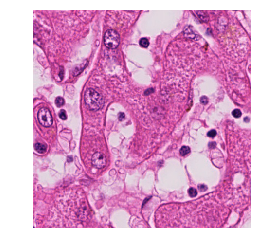

torch.Size([1, 11, 4, 4])
(tensor([[[ 0.9982,  0.9997,  0.9996,  0.9974],
         [ 0.9991,  0.9995,  0.9998,  0.9988],
         [ 0.9993,  0.9998,  1.0000,  0.9996],
         [ 0.9971,  0.9995,  0.9996,  0.9967]]], device='cuda:0'), tensor([[[ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  0]]], device='cuda:0'))


In [19]:
import os
train_path = '/mnt/DATA_CRLM/Patches/Patches_Level0/Patches_448/All/'
index =36000

model.to(device)

pairwise_dis = torch.nn.PairwiseDistance(p=2)
flist = os.listdir(train_path)
flist.sort()
print len(flist)

tmp_train_img = flist[index]
print tmp_train_img

test_img = plt.imread(train_path+tmp_train_img)

plt.imshow(test_img)
plt.axis('off')
plt.show()

if test_img.max()>2:
    test_img = test_img/255.0
test_tensor = torch.from_numpy(((test_img[:512,:512,:3]-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()
test_tensor = test_tensor.unsqueeze(0)

feature_ref = softmax(model(test_tensor.to(device)))
print feature_ref.shape
print torch.max(feature_ref,1)

In [20]:
#tindex = 3916
simi_index = []
for tindex in range(36000,60000,1000):
    tmp_train_img = flist[tindex]
    #print tmp_train_img

    test_img = plt.imread(train_path+tmp_train_img)

    if test_img.max()>2:
        test_img = test_img/255.0
    test_tensor = torch.from_numpy(((test_img[:512,:512,:3]-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()
    test_tensor = test_tensor.unsqueeze(0)

    feature_tmp = softmax(model(test_tensor.to(device)))
    
    pwdis = torch.mean(pairwise_dis(feature_tmp,feature_ref)).cpu().item()
    if pwdis<0.0005:
        simi_index.append(tmp_train_img)
        print tmp_train_img, pwdis
    

#     plt.imshow(test_img)
#     plt.axis('off')
#     plt.show()

H01_05401.jpg 3.31662499775e-06


In [ ]:
print len(simi_index)
test_img = plt.imread(train_path+simi_index[23])
plt.imshow(test_img)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [16]:
label_list = ['H', 'N', 'F', 'T', 'I', 'M', 'B', 'D' ,'C', 'G','Y']
label_dict = {}
label_point = [(35981,81083),(93094,105493),(3888,31980),(105494,128220),(81084,82911),(82912,93093),(0,1030),(3617,3887),(1031,3616),(37981,35980),(128221,128601)]
# for i,f in enumerate(flist):
#     if i == len(flist)-2:
#         break
#     else:
#         if flist[i][0]!=flist[i+1][0]:
#             print i, flist[i][0], i+1, flist[i+1][0]
label_dict = dict(zip(label_list,label_point))

## Plot Scatters  Plot feature map

In [17]:
X = []
Y =[]

sample_interval = 200
for tlabel in label_list:
    x,y =label_dict[tlabel]
    for tindex in range(x,y,(y-x)/sample_interval):
        tmp_train_img = flist[tindex]
        #print tmp_train_img

        test_img = plt.imread(train_path+tmp_train_img)

        if test_img.max()>2:
            test_img = test_img/255.0
        test_tensor = torch.from_numpy(((test_img[:512,:512,:3]-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()
        test_tensor = test_tensor.unsqueeze(0)

        feature_tmp = softmax(model(test_tensor.to(device)))

        pwdis = torch.mean(pairwise_dis(feature_tmp,feature_ref)).cpu().item()

        X.append(feature_tmp.view(-1).detach().cpu().numpy())
        Y.append(label_list.index(tlabel))

X_2d = tsne.fit_transform(X)
y = np.array(Y)
plt.figure(figsize=(10, 8))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple','brown'
for i, c, label in zip(range(len(label_list)), colors, label_list):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
#plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0))
plt.legend(loc='lower right')
#plt.show()
plt.savefig('./tsne_train.png')
plt.show()

NameError: name 'flist' is not defined